In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

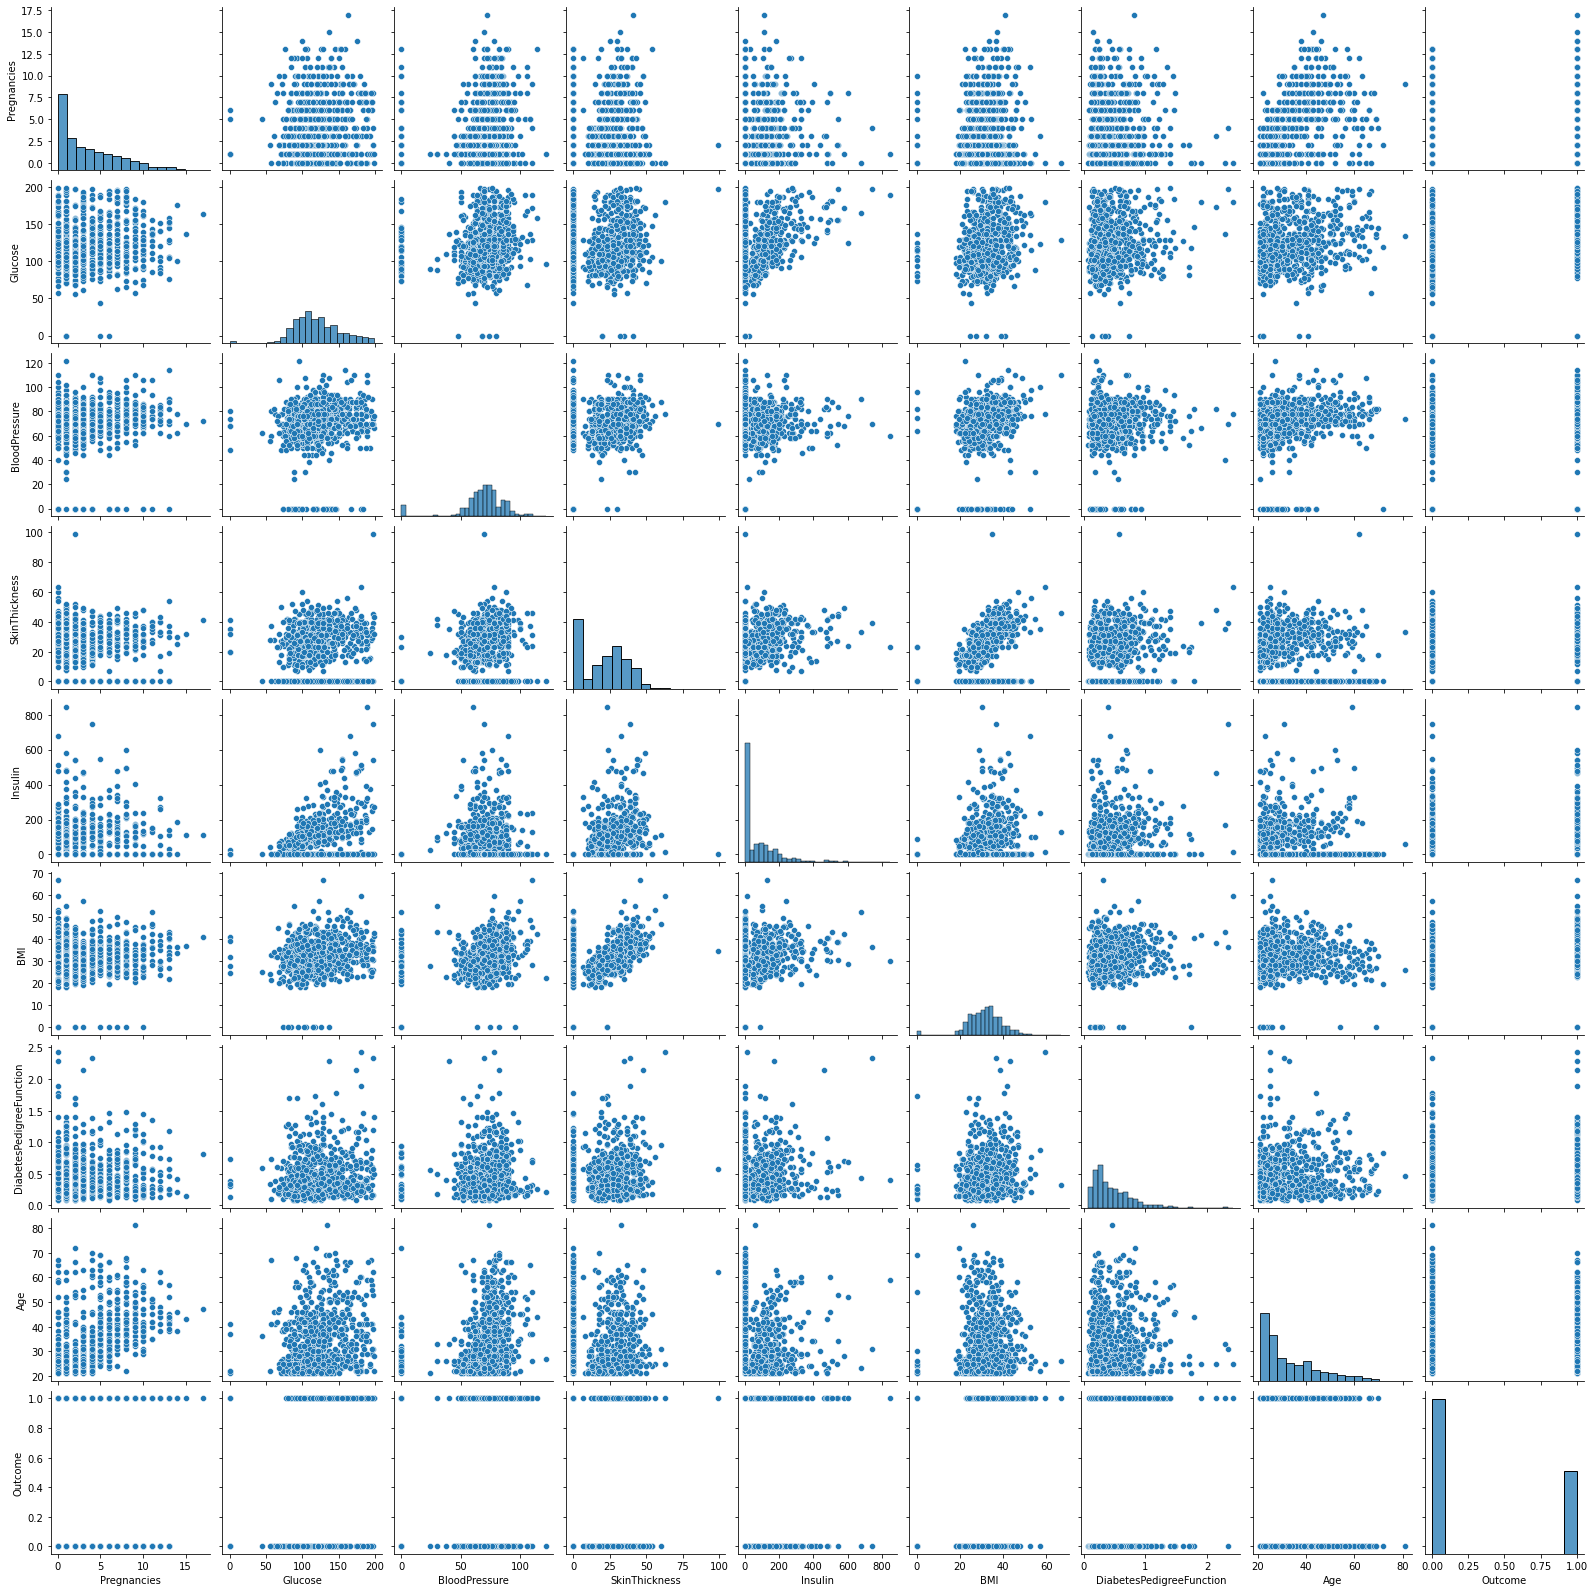

In [7]:
# visualize pairplot
sns.pairplot(diabetes)

Text(0.5, 1.0, 'correlation heatmap')

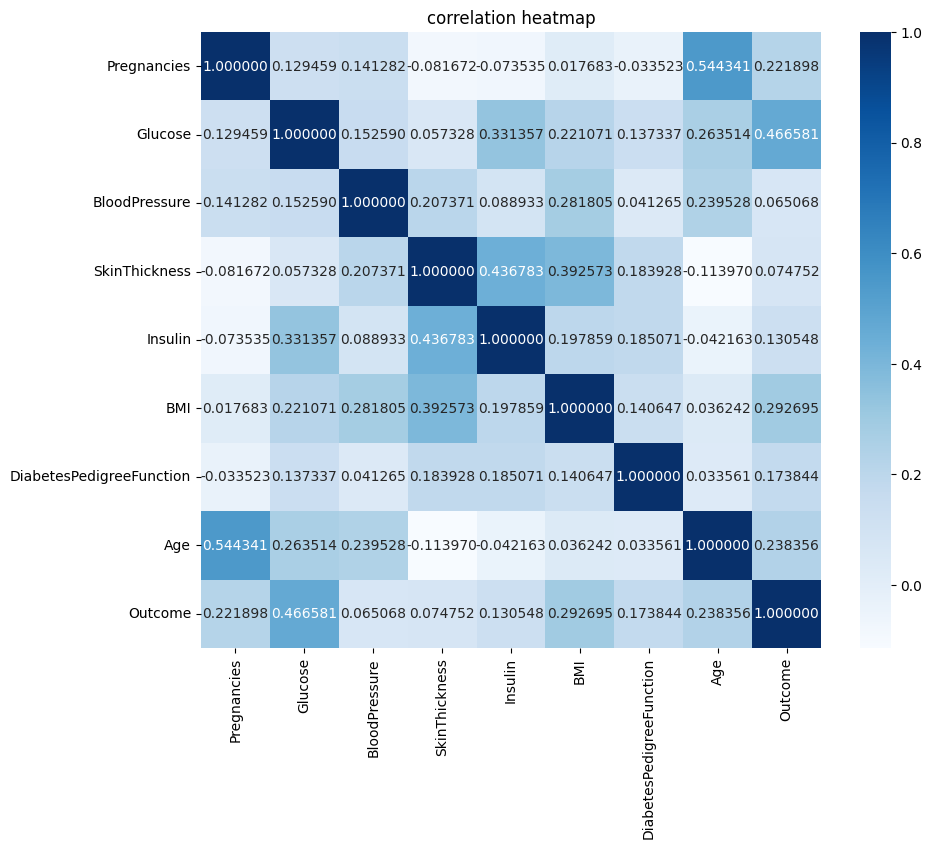

In [8]:
plt.figure(figsize =(10,8))
sns.heatmap(diabetes.corr(), annot = True ,fmt = "3f" , cmap = "Blues")
plt.title("correlation heatmap")

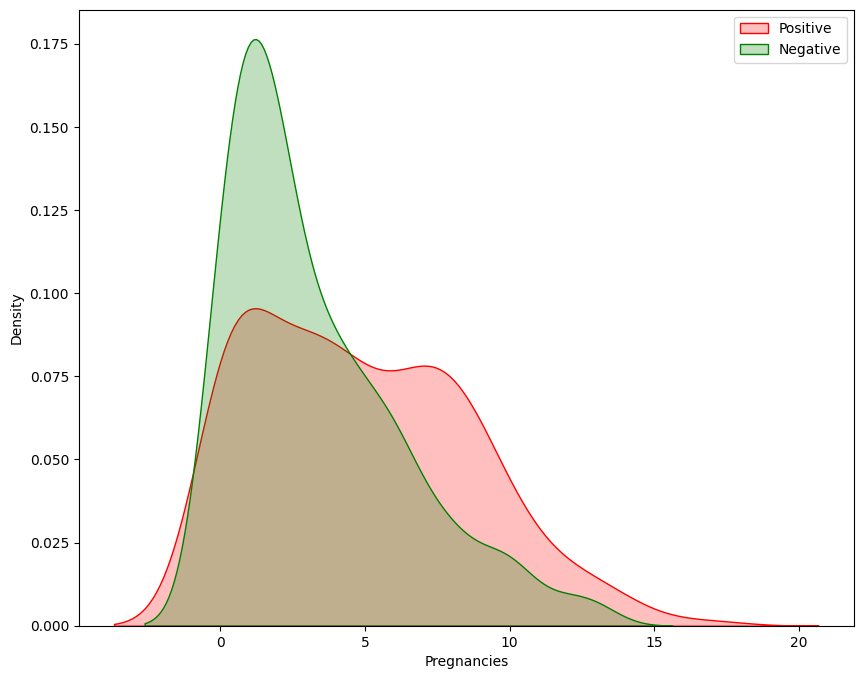

In [9]:
#exploring pregnancy and target varibles
plt.figure(figsize =(10,8))
kde = sns.kdeplot(diabetes["Pregnancies"][diabetes["Outcome"]==1], color = "Red", shade = True)
kde = sns.kdeplot(diabetes["Pregnancies"][diabetes["Outcome"]==0], color = "Green", shade = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

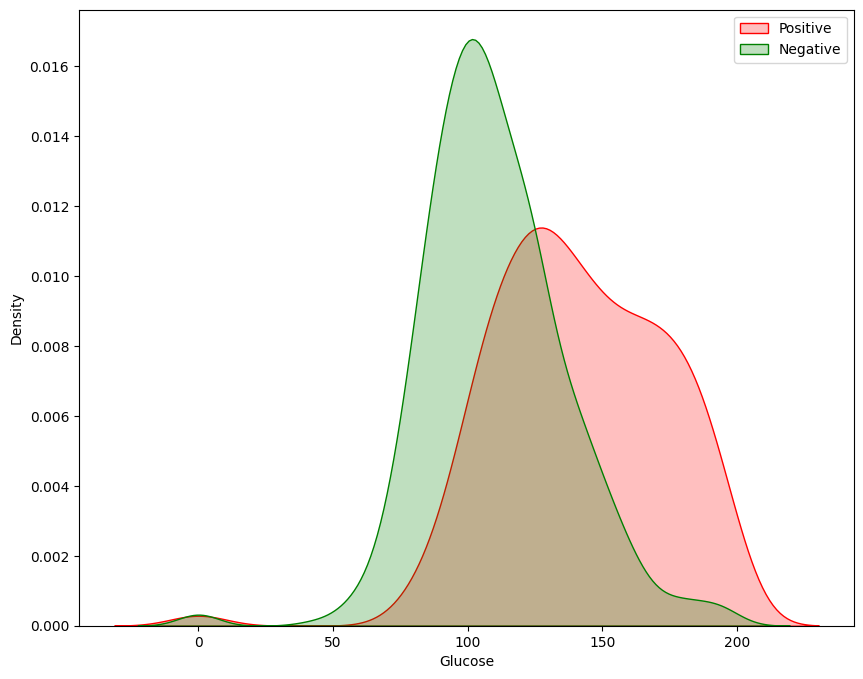

In [10]:
#exploring glucose and target varibles
plt.figure(figsize =(10,8))
kde = sns.kdeplot(diabetes["Glucose"][diabetes["Outcome"]==1], color = "Red", shade = True)
kde = sns.kdeplot(diabetes["Glucose"][diabetes["Outcome"]==0], color = "Green", shade = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

In [11]:
#Glucose
diabetes["Glucose"] = diabetes["Glucose"].replace(0 , diabetes["Glucose"].median())
#BloodPressure
diabetes["BloodPressure"] = diabetes["BloodPressure"].replace(0 , diabetes["BloodPressure"].median())
#SkinThickness
diabetes["SkinThickness"] = diabetes["SkinThickness"].replace(0 , diabetes["SkinThickness"].mean())
#Insulin
diabetes["Insulin"] = diabetes["Insulin"].replace(0 , diabetes["Insulin"].mean())
#BMI
diabetes["BMI"] = diabetes["BMI"].replace(0 , diabetes["BMI"].mean())

In [12]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [13]:
#columns name
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
#columns name
diabetes.describe().columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
#define X
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [17]:
y = diabetes['Outcome']

In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
#building the ml model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 , random_state = 2529)

In [20]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [21]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [22]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# predict with model
y_pred = model.predict(X_test)

In [24]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

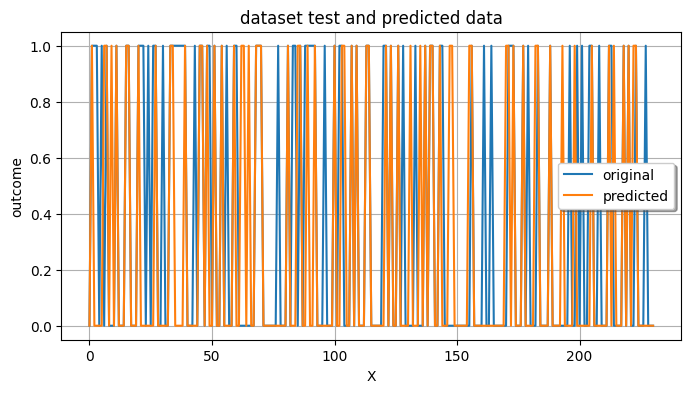

In [25]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(8 , 4))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [26]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
# model accuracy
accuracy_score(y_test,y_pred)

0.7532467532467533

In [28]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[127,  18],
       [ 39,  47]], dtype=int64)

In [29]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       145
           1       0.72      0.55      0.62        86

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



In [30]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [31]:
# predict with model
y_pred = svc.predict(X_test)

In [32]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

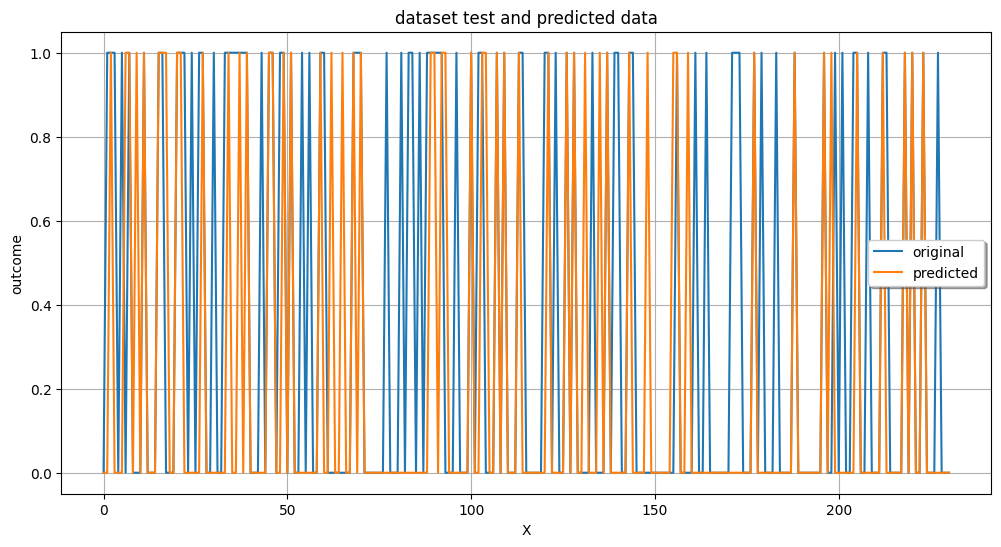

In [33]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [34]:
# model accuracy
accuracy_score(y_test,y_pred)

0.7445887445887446

In [35]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[132,  13],
       [ 46,  40]], dtype=int64)

In [36]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       145
           1       0.75      0.47      0.58        86

    accuracy                           0.74       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.74      0.73       231



In [37]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# predict with model
y_pred = dtf.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

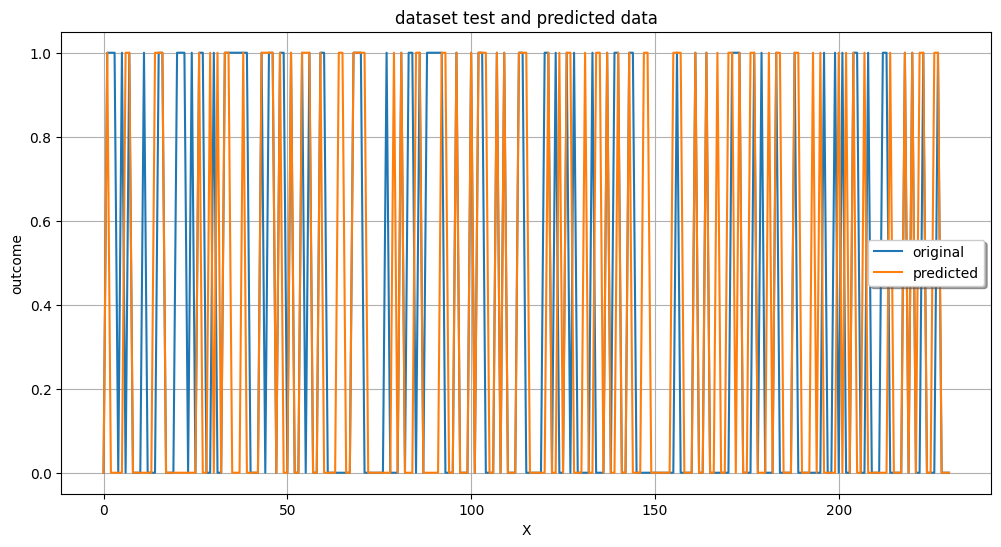

In [40]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [41]:
# model accuracy
accuracy_score(y_test,y_pred)

0.6753246753246753

In [42]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[108,  37],
       [ 38,  48]], dtype=int64)

In [43]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       145
           1       0.56      0.56      0.56        86

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.67      0.68      0.67       231



In [44]:
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(X_train, y_train)

GaussianNB()

In [45]:
# predict with model
y_pred = n_b.predict(X_test)

In [46]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

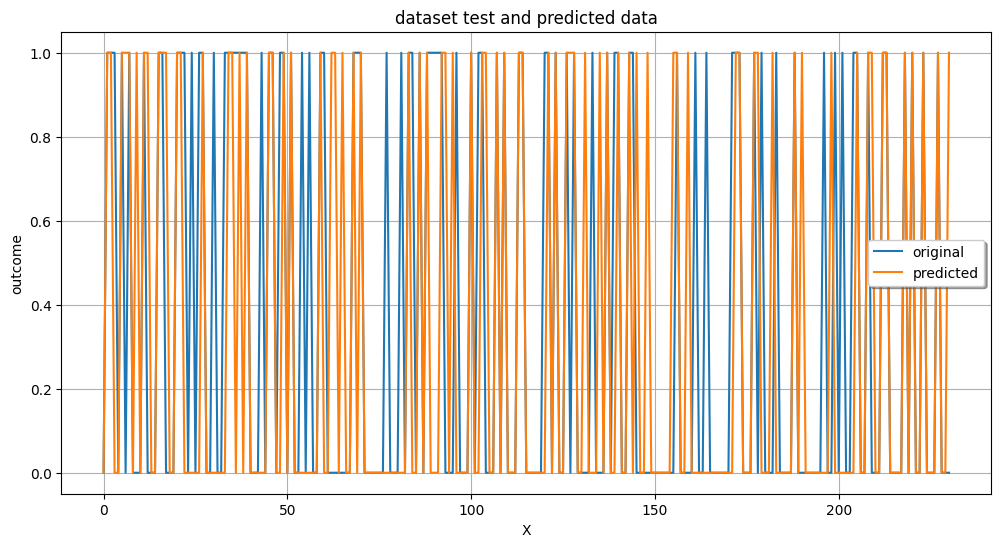

In [47]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [48]:
# model accuracy
accuracy_score(y_test,y_pred)

0.7489177489177489

In [49]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[122,  23],
       [ 35,  51]], dtype=int64)

In [50]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       145
           1       0.69      0.59      0.64        86

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.74      0.75      0.74       231



In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# predict with model
y_pred = knn.predict(X_test)

In [53]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

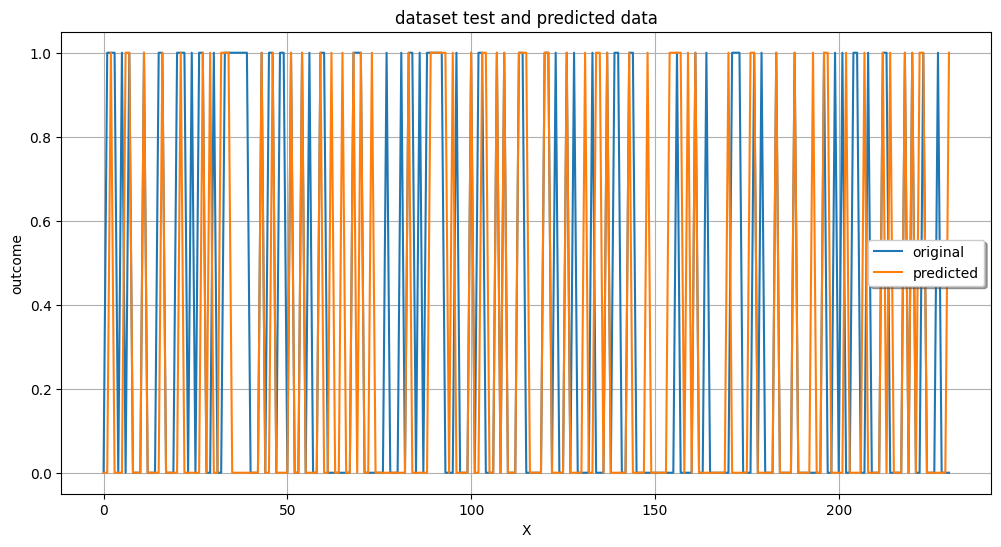

In [54]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [55]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [56]:
# model accuracy
accuracy_score(y_test,y_pred)

0.6883116883116883

In [57]:
print(dtf.score(X_test, y_test), ":test_accuracy")
print(dtf.score(X_train, y_train), ":train_accuracy")

0.6753246753246753 :test_accuracy
1.0 :train_accuracy


In [58]:
dtf = DecisionTreeClassifier(random_state=0, max_depth=5)
dtf.fit(X_train, y_train)
print(dtf.score(X_test, y_test), ":test_accuracy")
print(dtf.score(X_train, y_train), ":train_accuracy")

0.7316017316017316 :test_accuracy
0.8603351955307262 :train_accuracy


In [59]:
print(dtf.score(X_test, y_test))
print(n_b.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(svc.score(X_test, y_test))

0.7316017316017316
0.7489177489177489
0.6883116883116883
0.7445887445887446


In [60]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_test, y_test), ":test_accuracy")
print(mlp.score(X_train, y_train), ":train_accuracy")

0.683982683982684 :test_accuracy
0.74487895716946 :train_accuracy


In [61]:
# model accuracy
accuracy_score(y_test,y_pred)

0.6883116883116883

In [62]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[118,  27],
       [ 45,  41]], dtype=int64)

In [63]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.77       145
           1       0.60      0.48      0.53        86

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231



In [64]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
482,4,85,58,22.0,49.0,27.8,0.306,28,0


In [65]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
482,4,85,58,22.0,49.0,27.8,0.306,28


In [66]:
# predict for X_new
model.predict(X_new)

array([0], dtype=int64)

In [67]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
707,2,127,46,21.0,335.0,34.4,0.176,22,0


In [68]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
707,2,127,46,21.0,335.0,34.4,0.176,22


In [69]:
# predict for X_new
dtf.predict(X_new)

array([0], dtype=int64)

In [70]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
685,2,129,74,26.0,205.0,33.2,0.591,25,0


In [71]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
685,2,129,74,26.0,205.0,33.2,0.591,25


In [72]:
# predict for X_new
n_b.predict(X_new)

array([0], dtype=int64)

In [73]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
419,3,129,64,29.0,115.0,26.4,0.219,28,1


In [74]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
419,3,129,64,29.0,115.0,26.4,0.219,28


In [75]:
# predict for X_new
knn.predict(X_new)

array([0], dtype=int64)

In [76]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
503,7,94,64,25.0,79.0,33.3,0.738,41,0


In [77]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
503,7,94,64,25.0,79.0,33.3,0.738,41


In [78]:
# predict for X_new
svc.predict(X_new)

array([0], dtype=int64)

In [79]:
# future prediction
sample = diabetes.sample()
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
374,2,122,52,43.0,158.0,36.2,0.816,28,0


In [80]:
# define X_new
X_new = sample.loc[:,X.describe().columns]
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
374,2,122,52,43.0,158.0,36.2,0.816,28


In [81]:
# predict for X_new
mlp.predict(X_new)

array([1], dtype=int64)